#REGRESSION USING DEEP LEARNING

In [3]:
#IMPORTING LIBRARIES
!pip install neurolab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
import keras
import tensorflow as tf
import seaborn as sns

###TASK 1

In [4]:
#LOADING DATASET
wine=pd.read_csv('DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


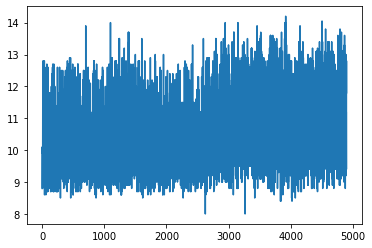

In [11]:
#DATA VISULAIZATION
plt.plot(wine['alcohol'])
plt.show()

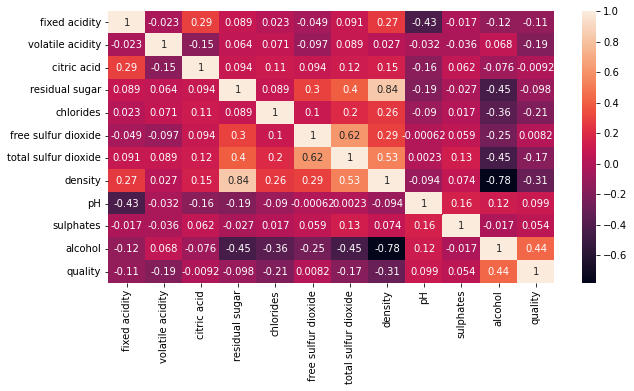

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(wine.corr(),annot=True)

In [17]:
#DATA NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
wine_scaled=scaler.fit_transform(wine)
wined=pd.DataFrame(wine_scaled,columns=wine.columns)
wined.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5


In [18]:
#FEATURES
x=wined.drop(['alcohol'],axis=1)
#LABELS
y=wined['alcohol']
x.shape,y.shape

((4898, 11), (4898,))

In [54]:
#DATA SPLITTING
#CREATE TRAIN 80% AND TEST 20% DATASET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x['quality'],y,test_size=0.2,random_state=42)
#setting random state for reproducible splits
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3918,), (980,), (3918,), (980,))

###TASK 2

In [55]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,y_pred)
def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)

In [56]:
#MODEL 1
tf.random.set_seed(42)
model1=tf.keras.Sequential([tf.keras.layers.Dense(1)]) 
#COMPILE THE MODEL
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#FITTING
model1.fit(X_train,y_train,epochs=200,verbose=0)

In [57]:
#EVALUATE THE MODEL1
model1.evaluate(X_test,y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.1441 - mae: 0.1441


[0.14405255019664764, 0.14405255019664764]

In [58]:
#PREDICTIONS FOR THE MODEL1
y_pred1=model1.predict(X_test)
# print(y_pred1)

In [61]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred1):
  plt.scatter(train_data,train_labels,c='b',label='training data')
  plt.scatter(test_data,test_labels,c='r',label='testing data')
  plt.scatter(test_data,predictions,c='g',label='predictions')
  plt.legend()
  plt.show()

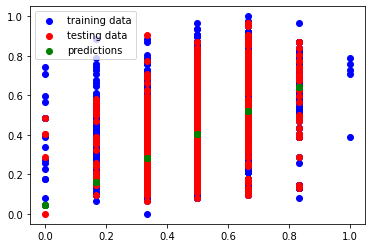

In [62]:
#PLOTTING PREDCITIONS FOR THE MODEL1
plot_predictions(predictions=y_pred1)

In [71]:
#CALCULATE MODEL1 METRICS
mae1=mae(y_test,y_pred1.squeeze()).numpy()
mse1=mse(y_test,y_pred1.squeeze()).numpy()
mae1,mse1

(0.14405255, 0.032482073)

In [69]:
#MODEL 2
tf.random.set_seed(42)
model2=tf.keras.Sequential([tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)]) 
#COMPILE THE MODEL
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#FITTING
model2.fit(X_train,y_train,epochs=200,verbose=0)

In [72]:
#EVALUATE THE MODEL2
model2.evaluate(X_test,y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.1442 - mae: 0.1442


[0.1441606879234314, 0.1441606879234314]

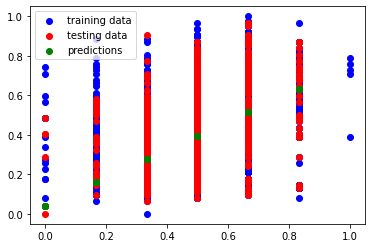

In [73]:
#PREDICTIONS FOR THE MODEL1
y_pred2=model2.predict(X_test)
#PLOTTING PREDCITIONS FOR THE MODEL2
plot_predictions(predictions=y_pred2)

In [74]:
#CALCULATE MODEL2 METRICS
mae2=mae(y_test,y_pred2.squeeze()).numpy()
mse2=mse(y_test,y_pred2.squeeze()).numpy()
mae2,mse2

(0.14416069, 0.03274443)

In [79]:
#MODEL 3
tf.random.set_seed(42)
model3=tf.keras.Sequential([tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#FIT THE MODEL
model3.fit(X_train,y_train,epochs=200,verbose=0)

In [80]:
#EVALUATE THE MODEL3
model3.evaluate(X_test,y_test)

31/31 [==============================] - 0s 915us/step - loss: 0.1441 - mae: 0.1441


[0.14409086108207703, 0.14409086108207703]

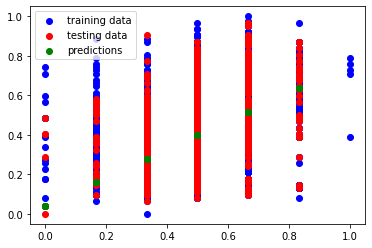

In [81]:
#MAKE AND PLOT PREDICTIONS FOR MODEL3
y_pred3=model3.predict(X_test)
plot_predictions(predictions=y_pred3)

In [82]:
#CALCULATE MODEL3 METRICS
mae3=mae(y_test,y_pred3.squeeze()).numpy()
mse3=mse(y_test,y_pred3.squeeze()).numpy()
mae3,mse3

(0.14409083, 0.032642413)

In [83]:
#COMPARING THE RESULTS
model_results=[['model1',mae1,mse1],['model2',mae2,mse2],['model3',mae3,mse3]]

In [84]:
#FOR DIFFERENT HIDDEN LAYERS -MSE,MAE
all_results=pd.DataFrame(model_results,columns=['Model','MAE','MSE'])
all_results

,Model,MAE,MSE
0,model1,0.144053,0.032482
1,model2,0.144161,0.032744
2,model3,0.144091,0.032642


Model 1 is best while comparing with other models

### TASK 3

In [89]:
#MODEL 1-MAE
tf.random.set_seed(42)
model11=tf.keras.Sequential([tf.keras.layers.Dense(1)]) 
#COMPILE THE MODEL
model11.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#FITTING
history1=model11.fit(X_train,y_train,epochs=200,verbose=0)

In [90]:
#CHECKING THE RESULTS OF MODEL1
model11.evaluate(X_test,y_test)

31/31 [==============================] - 0s 879us/step - loss: 0.1441 - mae: 0.1441


[0.14405255019664764, 0.14405255019664764]

Text(0.5, 0, 'epochs')

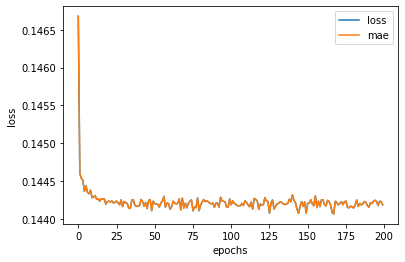

In [91]:
#PLOT THE HISTORY1
pd.DataFrame(history1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [92]:
#MODEL 1-MSE
tf.random.set_seed(42)
model12=tf.keras.Sequential([tf.keras.layers.Dense(1)]) 
#COMPILE THE MODEL
model12.compile(loss=tf.keras.losses.mse,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])
#FITTING
history2=model12.fit(X_train,y_train,epochs=200,verbose=0)

In [93]:
#CHECKING THE RESULTS OF MODEL1
model12.evaluate(X_test,y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.0320 - mse: 0.0320


[0.03196331113576889, 0.03196331113576889]

Text(0.5, 0, 'epochs')

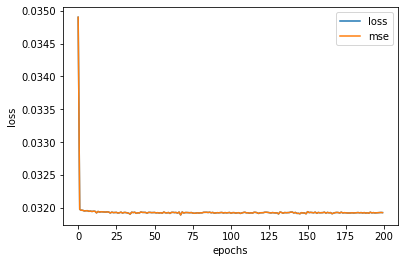

In [94]:
#PLOT THE HISTORY2
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [95]:
#MODEL 1-MSLE
tf.random.set_seed(42)
model13=tf.keras.Sequential([tf.keras.layers.Dense(1)]) 
#COMPILE THE MODEL
model13.compile(loss=tf.keras.losses.msle,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['msle'])
#FITTING
history3=model13.fit(X_train,y_train,epochs=200,verbose=0)

In [96]:
#CHECKING THE RESULTS OF MODEL1
model13.evaluate(X_test,y_test)

31/31 [==============================] - 0s 997us/step - loss: 0.0157 - msle: 0.0157


[0.015696074813604355, 0.015696074813604355]

Text(0.5, 0, 'epochs')

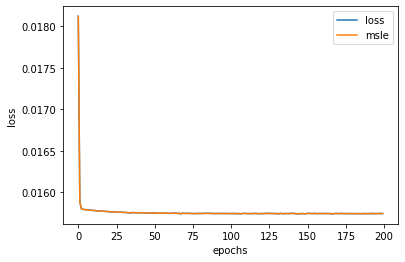

In [97]:
#PLOT THE HISTORY3
pd.DataFrame(history3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

MSLE value is better while comparing with other metrices